Fashion-MNIST数据集

In [10]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:


In [3]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()
# svg 显示图片，清晰度更高

通过框架内置函数将Fashion-MNIST数据集下载并读取到内存中

In [4]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root='../data',
    train=True,
    transform=trans,
    download=True
)
mnist_test = torchvision.datasets.FashionMNIST(
    root='../data',
    train=False,
    transform=trans,
    download=True
)

len(mnist_train), len(mnist_test)

100%|██████████| 26421880/26421880 [00:01<00:00, 18591077.93it/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 337128.36it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6267250.68it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8944605.22it/s]


Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



(60000, 10000)

`transforms.ToTensor()` 是PyTorch中的一个图像预处理操作，用于将PIL图像或NumPy数组转换为PyTorch张量。在深度学习中，神经网络通常接受张量作为输入，因此在训练之前需要将图像数据转换为张量形式。

具体而言，`transforms.ToTensor()` 将图像的每个像素值从范围[0, 255]标准化到范围[0, 1]，并将其转换为浮点张量。如果输入是一个多通道的图像（如RGB），它还会重新排列通道的顺序，将通道维度放在最前面。

以下是一个简单的示例，说明如何在PyTorch中使用 `transforms.ToTensor()`：

```python
import torchvision.transforms as transforms
from PIL import Image

# 创建一个PIL图像
image = Image.open('example.jpg')

# 定义一个变换
transform = transforms.ToTensor()

# 应用变换
tensor_image = transform(image)
```

在这个例子中，`tensor_image` 就是经过 `transforms.ToTensor()` 变换后的图像张量。这种转换是深度学习中常见的数据预处理步骤之一，确保输入数据的格式符合神经网络的要求。

In [5]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

可视化数据集

In [6]:
def get_fashion_mnist_labels(labels):
  # 返回Fashion-MNIST数据集的文本标签
  text_labels = [
      't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
  ]
  return [text_labels[int(i)] for i in labels]

0 T恤（T-shirt/top）

1	裤子（Trouser）

2	套头衫（Pullover）

3	连衣裙（Dress）

4	外套（Coat）

5	凉鞋（Sandal）

6	衬衫（Shirt）

7	运动鞋（Sneaker）

8	包（Bag）

9	靴子（Ankle boot）

In [7]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  # plot a list of images
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
  axes = axes.flatten()

  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):
      # 图片张量
      ax.imshow(img.numpy())
    else:
      # PIL图片
      ax.imshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
      ax.set_title(titles[i])
  return axes


ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

这两行代码是用来隐藏图表（plot）的 x 轴和 y 轴的标签（ticks）的。具体来说：

1. `ax.axes.get_xaxis().set_visible(False)`：这一行代码表示获取 `ax` 对象的 x 轴，并将其标签设置为不可见（False）。这样做会隐藏 x 轴上的刻度标签和轴线。

2. `ax.axes.get_yaxis().set_visible(False)`：这一行代码表示获取 `ax` 对象的 y 轴，并将其标签设置为不可见（False）。同样，这将隐藏 y 轴上的刻度标签和轴线。

这样做的目的通常是为了美观或者在一些特定的情境中，如果图表中的轴线和刻度标签不是必需的话，可以将它们隐藏起来。

array([<Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirt'}>], dtype=object)

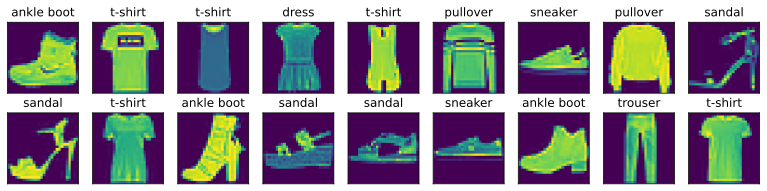

In [8]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9,
            titles=get_fashion_mnist_labels(y))

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):

这是函数的定义部分。函数接收五个参数：
imgs: 一个包含图片的列表。这些图片可以是PyTorch张量或PIL图片。
num_rows: 子图的行数。
num_cols: 子图的列数。
titles (可选参数): 每张图片的标题。如果未提供此参数，则不会有标题显示。
scale (可选参数): 用于调整子图大小的缩放因子。默认值为1.5。
figsize = (num_cols * scale, num_rows * scale)

这行代码定义了整个图像的大小，宽度为num_cols * scale，高度为num_rows * scale。
_, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)

使用d2l.plt.subplots函数创建一个子图网格。这个函数返回两个值：一个是figure对象（这里未使用，所以用下划线_表示），另一个是axes对象的数组。每个axes对象代表一个子图。
axes = axes.flatten()

将二维的axes数组转换为一维数组，这样后续循环中就可以遍历每一个axes对象。
for i, (ax, img) in enumerate(zip(axes, imgs)):

这是一个for循环，用于遍历axes对象和imgs列表。enumerate函数用于获取循环的索引（从0开始）和值。zip(axes, imgs)是将两个列表组合在一起，形成一个元组的列表。
if torch.is_tensor(img):

检查img是否是PyTorch张量。如果是，则执行下面的代码块。
ax.imshow(img.numpy())

如果img是PyTorch张量，使用.numpy()方法将其转换为NumPy数组，然后使用imshow方法在子图上显示该图片。
else:

如果img不是PyTorch张量（即它是一个PIL图片）。
ax.imshow(img)

使用PIL图片的imshow方法在子图上显示该图片。
这个函数的主要目的是在一个子图网格中展示多张图片，并允许用户通过参数自定义子图的大小、行数、列数和标题等属性。

axes.flatten() 的目的是将二维的 axes 数组转换为一维数组，这样在后续的循环中可以遍历每一个 axes 对象。如果不进行 flatten()，那么 axes 将仍然是一个二维数组，导致循环中的 ax 变量每次只引用一个子图，而不是具体的子图对象。通过将 axes 转换为一维数组，可以确保每次循环中 ax 都是一个具体的子图对象，从而可以对每个子图进行独立的操作和设置。

读取一小批量数据，大小为batch_size

In [9]:
batch_size =256

def get_dataloader_workers():
  # 使用4个进程读取数据
  return 4

train_iter = data.DataLoader(mnist_train, batch_size,
                             shuffle=True,
                             num_workers=get_dataloader_workers())

timer = d2l.Timer()

for X, y in train_iter:
  continue

f'{timer.stop():.2f} sec'

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


'6.76 sec'

定义load_data_fashion_mnist函数

In [11]:
def load_data_fashion_mnist(batch_size, resize=None):
  # 下载Fashion_MNIST数据集，然后将其家在到内存中
  trans = [transforms.ToTensor()]

  if resize:
    trans.insert(0, transforms.Resize(resize))

  trans = transforms.Compose(trans)

  mnist_train = torchvision.datasets.FashionMNIST(
    root='../data',
    train=True,
    transform=trans,
    download=True
  )

  mnist_test = torchvision.datasets.FashionMNIST(
      root='../data',
      train=False,
      transform=trans,
      download=True
  )

  return (data.DataLoader(mnist_train, batch_size,
                             shuffle=True,
                             num_workers=get_dataloader_workers()),
          data.DataLoader(mnist_test, batch_size,
                             shuffle=False,
                             num_workers=get_dataloader_workers())
  )

trans = [transforms.ToTensor()]

  if resize:
    trans.insert(0, transforms.Resize(resize))
这段代码是使用PyTorch中的`transforms`模块创建图像转换（image transformations）的操作。通常，这样的图像转换操作用于预处理图像数据，以便于在深度学习模型中进行训练或推理。

让我解释一下代码的每一部分：

1. `trans = [transforms.ToTensor()]`：创建了一个包含一个`ToTensor()`操作的列表。`ToTensor()`操作将图像转换为PyTorch张量（tensor），这是神经网络处理图像数据的常见格式。

2. `if resize:`：这是一个条件语句，检查是否设置了`resize`参数。如果`resize`的值为真（非空），则执行以下操作。

3. `trans.insert(0, transforms.Resize(resize))`：在列表`trans`的开头插入一个`Resize`操作。`Resize`操作用于调整图像的大小，参数`resize`指定了新的大小。这意味着在`ToTensor()`之前，图像将首先被调整大小。

综合起来，这段代码构建了一个图像转换的序列，如果指定了`resize`参数，就在转换序列的开头插入了一个调整大小的操作。最终，这个`trans`列表可以用于创建一个`transforms.Compose`对象，将多个转换组合在一起，以便一次性应用于输入的图像。例如：

```python
composed_transform = transforms.Compose(trans)
transformed_image = composed_transform(input_image)
```

这样，`input_image`就会按照定义好的转换序列进行预处理。

 trans.insert(0, transforms.Resize(resize))，这里的0啥意思

在`trans.insert(0, transforms.Resize(resize))`这行代码中，数字`0`表示将指定的元素插入到列表的起始位置（索引为0）。这意味着`transforms.Resize(resize)`将被插入到`trans`列表的开头。

列表的索引从0开始，因此插入到索引为0的位置，就会将新的元素放在列表的最前面。这是因为`insert`方法的第一个参数是插入位置的索引，第二个参数是要插入的元素。